In [1]:
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt

#plt.rcParams['text.usetex'] = True

T:  0.0208
mu:  -3.8363073136718566
eta1:  0.0398524847266555
eta2:  0.2598046951325564
A1:  -0.11119004447400821
A2:  -0.1111900444740086
diff:  [3.88578059e-16]


C:\Users\Lucas\AppData\Local\Temp\ipykernel_13736\671832644.py:5: RuntimeWarning: divide by zero encountered in log
  return -(x**2)/(T) + (4*x**2)*(4-3*x)/((1-x)**2) - 4*x*(mu - np.log(x) + 1)
C:\Users\Lucas\AppData\Local\Temp\ipykernel_13736\671832644.py:5: RuntimeWarning: invalid value encountered in multiply
  return -(x**2)/(T) + (4*x**2)*(4-3*x)/((1-x)**2) - 4*x*(mu - np.log(x) + 1)


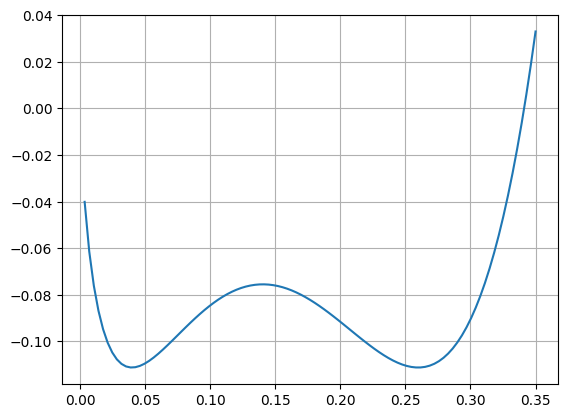

T:  0.0212
mu:  -3.769007427246021
eta1:  0.045085041914629094
eta2:  0.24876561192956054
A1:  -0.12096798887627411
A2:  -0.12096798870380776
diff:  [-1.72466347e-10]


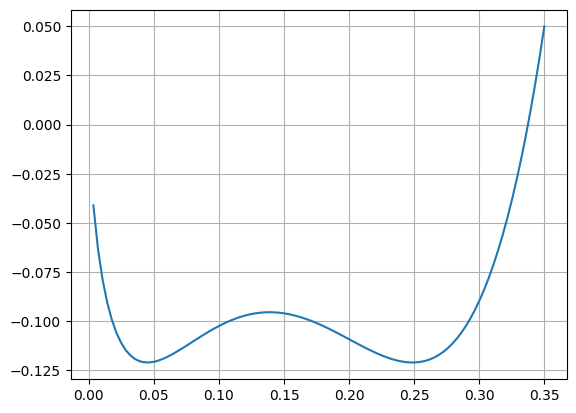

T:  0.0217
mu:  -3.690129640674391
eta1:  0.052740641016264564
eta2:  0.2339649004446127
A1:  -0.13375914543935336
A2:  -0.133759145494889
diff:  [5.55356316e-11]


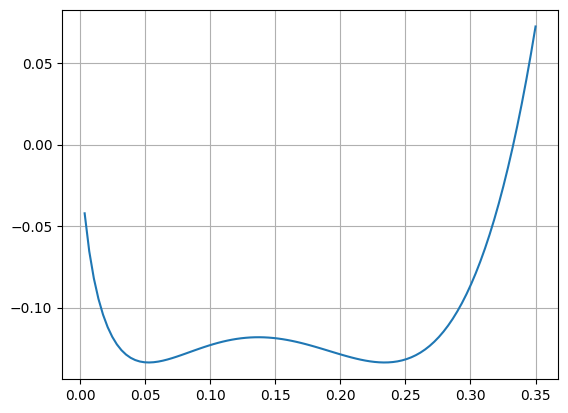

T:  0.02222
mu:  -3.6138096672477924
eta1:  0.06253596627542408
eta2:  0.2168690178315023
A1:  -0.14771582539223205
A2:  -0.14771582534888983
diff:  [-4.33422187e-11]


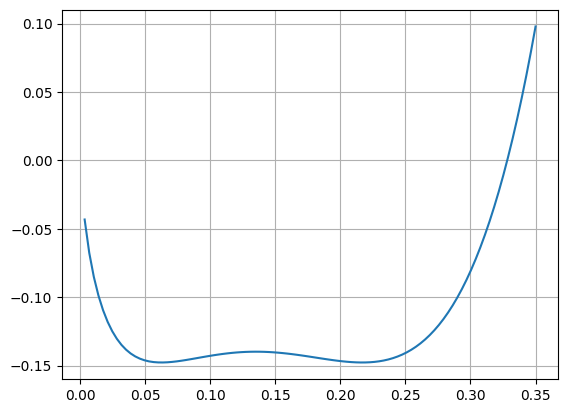

T:  0.02227
mu:  -3.606760471293842
eta1:  0.06361011862185648
eta2:  0.21509977730529262
A1:  -0.1490922549020277
A2:  -0.1490922547219372
diff:  [-1.80090498e-10]


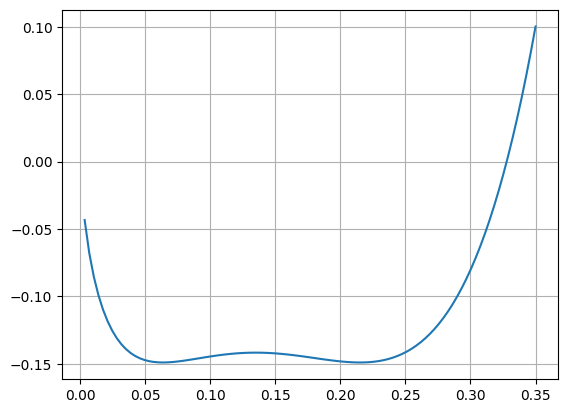

T:  0.02232
mu:  -3.5997603226721284
eta1:  0.06471265100241011
eta2:  0.21330335340400802
A1:  -0.1504746543710122
A2:  -0.1504746539505838
diff:  [-4.20428414e-10]


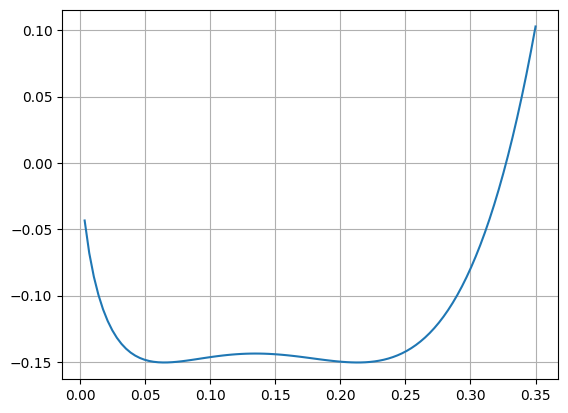

T:  0.022371
mu:  -3.5926702875224095
eta1:  0.06586819411993404
eta2:  0.21144127040972482
A1:  -0.1518908335905009
A2:  -0.15189083256064784
diff:  [-1.02985306e-09]


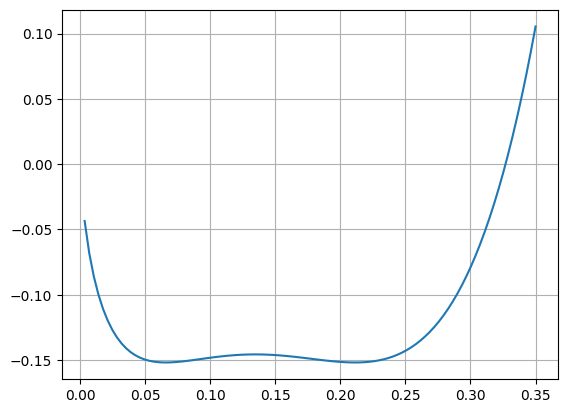

T:  0.022382
mu:  -3.5911476574712777
eta1:  0.06612171191960954
eta2:  0.2110355258755551
A1:  -0.15219709460567427
A2:  -0.15219709460567798
diff:  [3.71924713e-15]


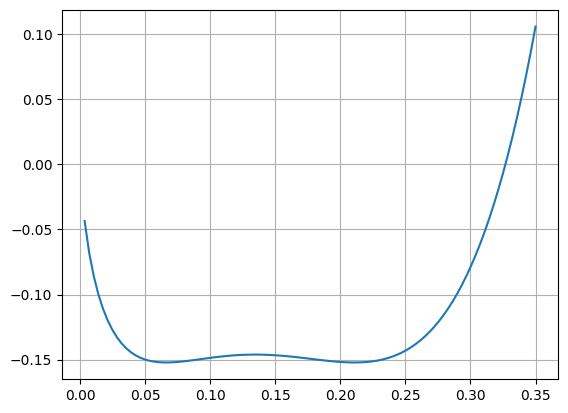

T:  0.022383
mu:  -3.591009352367571
eta1:  0.06614483620974076
eta2:  0.21099856551682114
A1:  -0.15222495070924646
A2:  -0.1522249507092498
diff:  [3.33066907e-15]


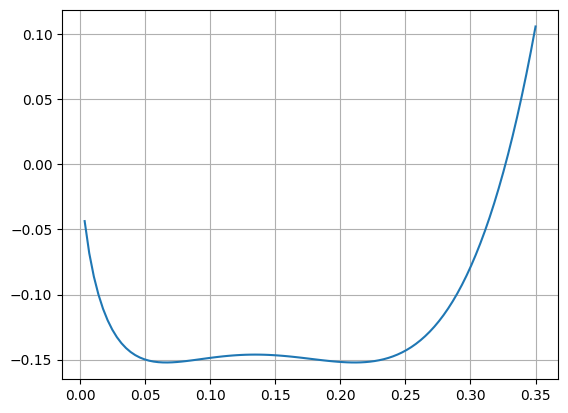

T:  0.0231
mu:  -3.5271225809448046
eta1:  0.07152894922956926
eta2:  0.07152894922956919
A1:  -0.16324627828306604
A2:  -0.16324627828306593
diff:  [-1.11022302e-16]


C:\Users\Lucas\AppData\Local\Temp\ipykernel_13736\671832644.py:9: RuntimeWarning: invalid value encountered in log
  return -2*x/T - 4*x*(8 + 3*x*(x-3))/(x-1)**3 - 4*mu + 4*np.log(x)


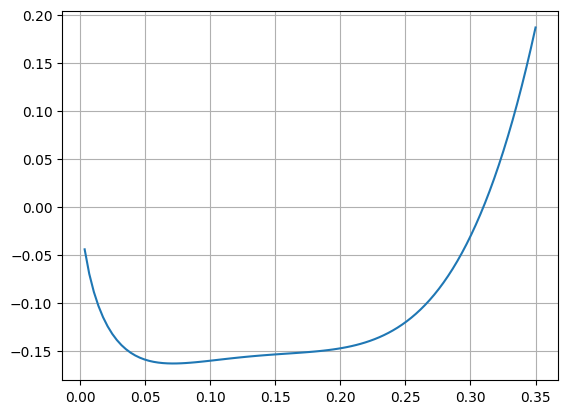

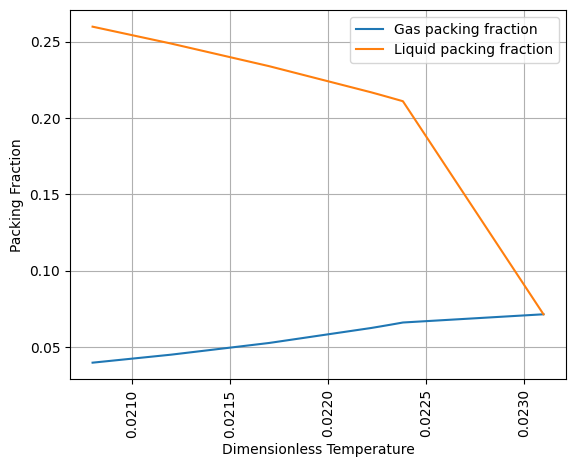

In [21]:
x = np.linspace(0,0.35,100)

def A(x, *args):
    T, mu = args
    return -(x**2)/(T) + (4*x**2)*(4-3*x)/((1-x)**2) - 4*x*(mu - np.log(x) + 1)

def dA(x, *args):
    T, mu = args
    return -2*x/T - 4*x*(8 + 3*x*(x-3))/(x-1)**3 - 4*mu + 4*np.log(x)

def d2A(x, *args):
    pass

def diff(mu, *args):
    T = args
    et1 = optimize.root(dA, 0.01, args=(T,mu)).x[0]
    et2 = optimize.root(dA, 0.9, args=(T,mu)).x[0]
    a1 = A(et1, T, mu)
    a2 = A(et2, T, mu)
    return a1 - a2

eta1s = []
eta2s = []
Ts = [0.0208, 0.0212, 0.0217, 0.02222, 0.02227, 0.02232, 0.022371, 0.022382, 0.022383, 0.0231]
for T in Ts:
    print("T: ", T)
    mu = optimize.root(diff, -3.83, args=(T), method="df-sane").x
    print("mu: ", mu)

    eta1 = optimize.root(dA, 0.01, args=(T,mu)).x[0]; eta1s.append(eta1)
    eta2 = optimize.root(dA, 0.9, args=(T,mu)).x[0]; eta2s.append(eta2)
    print("eta1: ", eta1)
    print("eta2: ", eta2)
    print("A1: ", A(optimize.root(dA, 0.01, args=(T,mu)).x[0], T, mu))
    print("A2: ", A(optimize.root(dA, 0.9, args=(T,mu)).x[0], T, mu))
    print("diff: ", diff(mu, T))

    plt.figure()
    plt.plot(x, A(x,T,mu))
    plt.grid()
    plt.show()

plt.figure()
plt.plot(Ts, eta1s, label='Gas packing fraction')
plt.plot(Ts, eta2s, label='Liquid packing fraction')
plt.legend()
plt.xlabel("Dimensionless Temperature")
plt.ylabel("Packing Fraction")
plt.xticks(rotation="vertical")
plt.grid()
plt.show()

T:  0.0231
mu:  [-1.44959797]
eta1:  0.3712916725716228
eta2:  0.3712916725716228
A1:  [-2.74527499]
A2:  [-2.74527499]
diff:  [0.]


C:\Users\Lucas\AppData\Local\Temp\ipykernel_13736\671832644.py:9: RuntimeWarning: invalid value encountered in log
  return -2*x/T - 4*x*(8 + 3*x*(x-3))/(x-1)**3 - 4*mu + 4*np.log(x)
C:\Users\Lucas\AppData\Local\Temp\ipykernel_13736\671832644.py:5: RuntimeWarning: divide by zero encountered in log
  return -(x**2)/(T) + (4*x**2)*(4-3*x)/((1-x)**2) - 4*x*(mu - np.log(x) + 1)
C:\Users\Lucas\AppData\Local\Temp\ipykernel_13736\671832644.py:5: RuntimeWarning: invalid value encountered in multiply
  return -(x**2)/(T) + (4*x**2)*(4-3*x)/((1-x)**2) - 4*x*(mu - np.log(x) + 1)


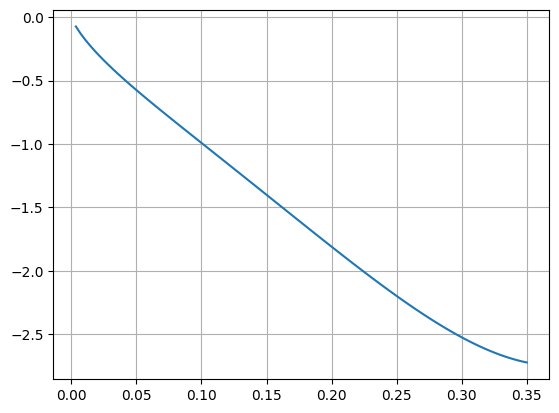

In [22]:
T = 0.0231
print("T: ", T)
mu = optimize.root(diff, -3.83, args=(T)).x
print("mu: ", mu)

eta1 = optimize.root(dA, 0.01, args=(T,mu)).x[0]; eta1s.append(eta1)
eta2 = optimize.root(dA, 0.9, args=(T,mu)).x[0]; eta2s.append(eta2)
print("eta1: ", eta1)
print("eta2: ", eta2)
print("A1: ", A(optimize.root(dA, 0.01, args=(T,mu)).x[0], T, mu))
print("A2: ", A(optimize.root(dA, 0.9, args=(T,mu)).x[0], T, mu))
print("diff: ", diff(mu, T))

plt.figure()
plt.plot(x, A(x,T,mu))
plt.grid()
plt.show()